### Tarea 1
#### Métodos de Aprendizajes de Máquinas en Data Science

Integrantes: Sofía Álvarez, Sebastián Dinator.

In [1]:
#Instalando las librerias requeridas
#import sys
#!{sys.executable} -m pip install numpy pandas plotnine sklearn

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler

In [3]:
#Graficos
from plotnine import ggplot
from plotnine import *

In [4]:
import sys
print("Python version:",sys.version)
print("Numpy version:",np.__version__)

Python version: 3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
Numpy version: 1.24.3


## Limpieza de Datos

In [5]:
# Importando la data
df = pd.read_csv('dataTaxi.csv')
df

,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,DoW,Hora_Inicio,Hora_Fin,distKilometros
0,1,-33.484436,-70.734913,-33.437822,-70.647421,1,sÃ¡bado,01-03-14 01:28,01-03-14 01:59,9.640889
1,3,-33.523092,-70.782872,-33.437234,-70.647150,0,sÃ¡bado,01-03-14 00:04,01-03-14 00:44,15.816194
2,4,-33.455709,-70.631109,-33.437341,-70.647136,0,sÃ¡bado,01-03-14 00:33,01-03-14 00:42,2.529204
3,5,-33.294220,-70.883511,-33.437682,-70.647190,0,sÃ¡bado,01-03-14 00:20,01-03-14 00:56,27.161926
4,6,-33.437601,-70.647152,-33.294479,-70.883178,10,sÃ¡bado,01-03-14 10:16,01-03-14 10:53,27.117458
...,...,...,...,...,...,...,...,...,...,...
452161,630819,-33.410845,-70.587625,-33.403157,-70.794847,23,domingo,31-07-16 23:18,31-07-16 23:44,19.275570
452162,630820,-33.378059,-70.659924,-33.410613,-70.794746,22,domingo,31-07-16 22:43,31-07-16 23:06,13.044041
452163,630821,-33.579867,-70.705105,-33.402888,-70.794640,23,domingo,31-07-16 23:02,31-07-16 23:33,21.382867
452164,630822,-33.396931,-70.792297,-33.433149,-70.624117,22,domingo,31-07-16 22:31,31-07-16 23:02,16.138766


In [11]:
print('Tipos de datos:')
display(df.dtypes)
print('Descripción de los datos:')
display(df.describe())

Tipos de datos:


Unnamed: 0          int64
LatitudPAB        float64
LongitudPAB       float64
LatitudCOM        float64
LongitudCOM       float64
Horas               int64
DoW                object
Hora_Inicio        object
Hora_Fin           object
distKilometros    float64
dtype: object

Descripción de los datos:


,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,distKilometros
count,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000
mean,315556.037500,-33.436718,-70.655944,-33.442694,-70.660850,11.793052,10.598621
std,181053.682589,0.055233,0.074918,0.060474,0.077424,6.895245,7.393171
min,1.000000,-33.868754,-70.979306,-33.869713,-70.979998,0.000000,0.030007
25%,160921.250000,-33.453083,-70.699870,-33.458440,-70.712886,7.000000,4.548679
50%,317026.000000,-33.433158,-70.646739,-33.436642,-70.650034,12.000000,9.529020
75%,470740.750000,-33.403836,-70.601023,-33.405790,-70.601565,18.000000,16.008261
max,630823.000000,-33.150050,-70.403065,-33.150720,-70.407848,23.000000,65.847860


### Resumen:
* 7 variables numéricas
* 3 variables categóricas

In [6]:
# La variable 'Unnamed: 0' no aporta información, ya que es un tipo de ID, porque cada punto del data
# frame tiene un valor distinto. Por lo que será eliminada.
(len(df['Unnamed: 0'].unique()) == len(df))

True

In [7]:
# Revisar la existencia de nulos
print(df.isnull().sum())

Unnamed: 0        0
LatitudPAB        0
LongitudPAB       0
LatitudCOM        0
LongitudCOM       0
Horas             0
DoW               0
Hora_Inicio       0
Hora_Fin          0
distKilometros    0
dtype: int64


#### No existen datos nulos, por lo que, hasta el moemnto, no es necesario descartar ninguna variable. 

### Revisando las variables

In [8]:
# Day of Week
display(df['DoW'].unique())

array(['sÃ¡bado', 'domingo', 'lunes', 'martes', 'miÃ©rcoles', 'jueves',
       'viernes'], dtype=object)

In [9]:
# Se reemplazan los nombres que están mal escritos
df['DoW'] = df['DoW'].str.replace('sÃ¡bado', 'sabado')
df['DoW'] = df['DoW'].str.replace('miÃ©rcoles', 'miercoles')

### Se decidió que las 4 columnas de longitud y latitud son importantes, ya que brindan información sobre el espacio de los viajes, que es fundamental para encontrar patrones.
### También, se define que las variables DoW, Hora_inicio y Hora_Fin son significativas para encontrar patrones de viaje, porque aportan información temporal de los viajes, no obstante, conservar la fecha y los minutos puede provocar overfitting, es por esto que solo se conservará la hora.
### Por último, se conserva la variable distKilometros porque, por ejemplo, podría ocurrir que se encuentra el siguiente patrón: 'Todos lo sábados a las 10 am de realizan viajes de 8 km en x sector'.

In [10]:
# Hora_Fin
# Convirtiendo a formato datetime
df['Hora_Fin'] = pd.to_datetime(df['Hora_Fin'], format='%d-%m-%y %H:%M')
# Dejando solo la hora
df['Fin'] = df['Hora_Fin'].dt.hour

In [11]:
# La columna Hora_Inicio será eliminada y se reutilizará la variable Horas
df.rename(columns={'Horas': 'Inicio'}, inplace=True)

## Estandarizando
### Debido a que las variables escogidas tienen diferente escala y orden de magnitud se ha decidido estandarizar.

In [12]:
scaler = StandardScaler()
data = scaler.fit_transform(df[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM', 'Inicio', 'Fin', 'distKilometros']])
data_estandarizada = pd.DataFrame(data, columns = ['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM', 'Inicio', 'Fin', 'distKilometros'])
display(data_estandarizada.head(5))

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470
3,2.579938,-3.037538,0.082890,0.176426,-1.710319,-1.694343,2.240354
4,-0.015977,0.117358,2.450896,-2.871585,-0.260042,-0.269221,2.234340


In [14]:
# Se agrega la variables DoW al set de datos.
data_estandarizada['DoW'] = df['DoW']
display(data_estandarizada.head(3))

# Como la variable DoW es categórica se utiliza el método one hot encoding para transformarla en numérica,
# si bien, la dimensión aumentará, se considera que es información significativa.
data_encoded = pd.get_dummies(data_estandarizada, columns=['DoW'])
data_encoded.head(3)

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros,DoW
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543,sabado
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729,sabado
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470,sabado


,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros,DoW_domingo,DoW_jueves,DoW_lunes,DoW_martes,DoW_miercoles,DoW_sabado,DoW_viernes
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543,0,0,0,0,0,1,0
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729,0,0,0,0,0,1,0
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470,0,0,0,0,0,1,0


## K-Means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[3543950.7670103493, 2855432.3987908373, 2542728.213471628, 2293577.2553823167, 2108941.445976385, 1954477.7041606067, 1854626.4142610286, 1768615.637153229, 1696534.5398859754, 1638813.6608757293, 1584366.9244661955, 1541864.4742425792, 1501862.395121145, 1467304.0637566086, 1433514.339579496, 1405173.916994186, 1378916.3903834468, 1356031.1144616187, 1331911.3557852607]


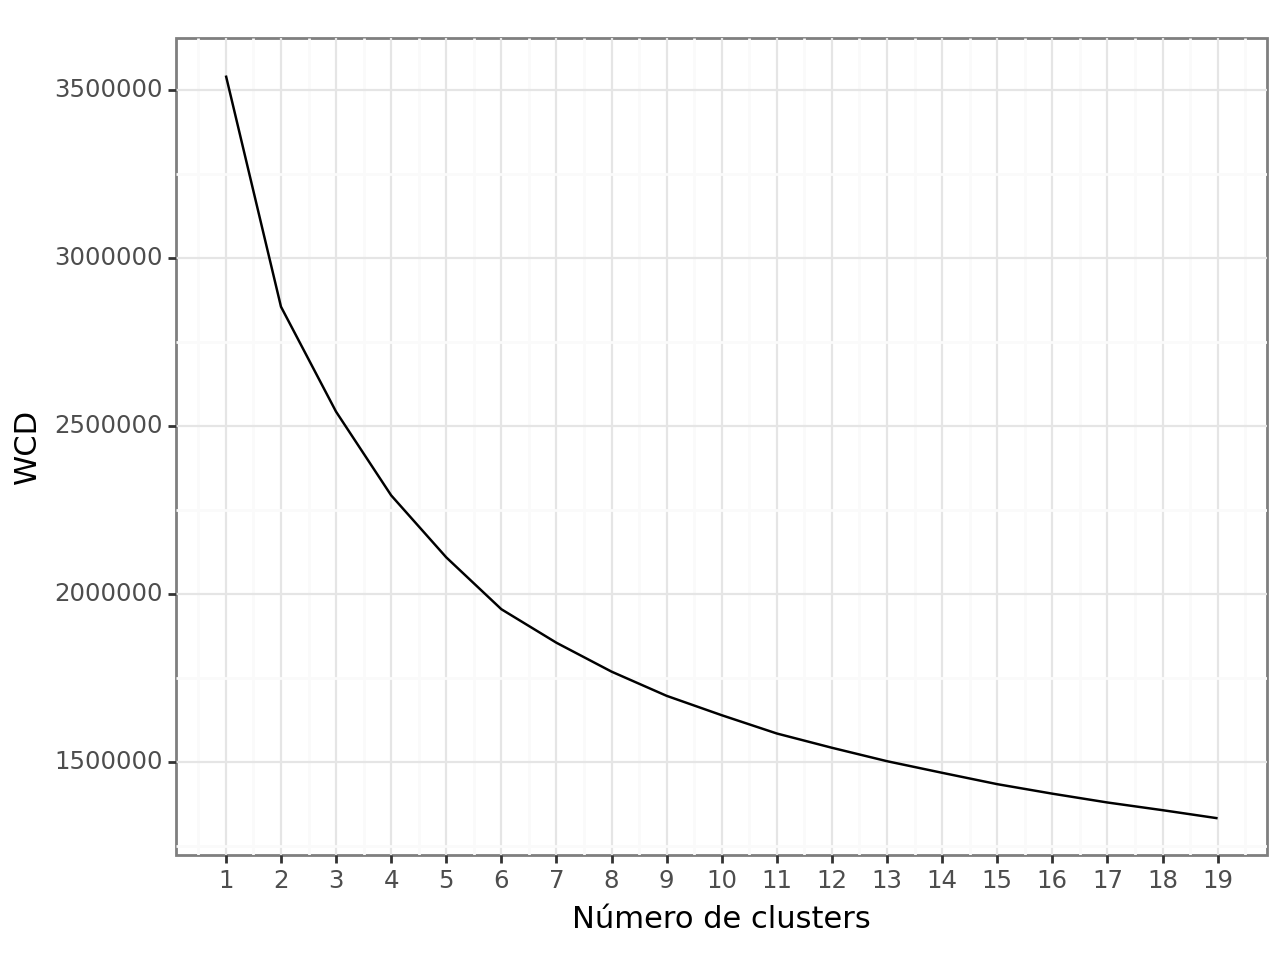

<Figure Size: (640 x 480)>

In [15]:
from sklearn.cluster import KMeans
sse = []
numK = 20
for k in range(1, numK):
    kmeans = KMeans(n_clusters=k,n_init=100)
    kmeans.fit(data_encoded)
    print(k)
    sse.append(kmeans.inertia_)

print(sse)
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
  +scale_x_continuous(breaks=range(1,numK)))

In [16]:
km = KMeans(n_clusters=6)  
print(km)

KMeans(n_clusters=6)


In [17]:
km=km.fit(data_encoded)
print(km)

C:\Users\sebad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


KMeans(n_clusters=6)


In [18]:
from sympy import Matrix
print('Centroides por variable:')
Matrix(km.cluster_centers_) #Mostrando los centros de los clusters

Centroides por variable:


Matrix([
[ 0.882463560467463,  -1.47678957533036,  0.281928478263779,   0.167901806825123,  0.829306192375257,  0.719292817587715,  0.559565132865041, 0.0642949617986538, 0.197972319979579,  0.151966594336355, 0.167174194489523, 0.177987272296276, 0.0557794350941815, 0.184825222005437],
[ 0.166535599349334, -0.333965821480419,  0.105560959152532,  0.0558897596508602,  -1.23885261982075,  -1.18673371367306, -0.240350634590607, 0.0696499949044853, 0.178037208564988, 0.0916059923227606, 0.157043696850969, 0.167064871536462,  0.138541324606806, 0.198056911213527],
[ 0.148004593301659,  0.588633596205268,  0.675803636747533,   -1.49733898838391,   0.29951694210401,  0.291674942168083,  0.908488072580469, 0.0760802833530076, 0.157622983077528,  0.210909090909091, 0.189185360094449, 0.169980322707596, 0.0542778433687537, 0.141944116489574],
[ 0.111928957999803,  0.496157783289621,  0.165321852850052,   0.518816348219975,  0.587636432555979,  0.599325014138977, -0.758371820013939, 0.0197568577

In [19]:

tempDF=pd.DataFrame(data_encoded,columns=data_encoded.columns)

tempDF['labels']=km.labels_

display(tempDF)

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros,DoW_domingo,DoW_jueves,DoW_lunes,DoW_martes,DoW_miercoles,DoW_sabado,DoW_viernes,labels
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543,0,0,0,0,0,1,0,1
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729,0,0,0,0,0,1,0,1
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470,0,0,0,0,0,1,0,1
3,2.579938,-3.037538,0.082890,0.176426,-1.710319,-1.694343,2.240354,0,0,0,0,0,1,0,1
4,-0.015977,0.117358,2.450896,-2.871585,-0.260042,-0.269221,2.234340,0,0,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452161,0.468436,0.911923,0.653799,-1.730698,1.625317,1.583438,1.173645,1,0,0,0,0,0,0,2
452162,1.062036,-0.053113,0.530506,-1.729400,1.480290,1.583438,0.330768,1,0,0,0,0,0,0,2
452163,-2.591700,-0.656191,0.658238,-1.728029,1.625317,1.583438,1.458678,1,0,0,0,0,0,0,4
452164,0.720342,-1.820019,0.157853,0.474442,1.480290,1.583438,0.749361,1,0,0,0,0,0,0,0


In [20]:
data_encoded.columns[0:14]

Index(['LatitudPAB', 'LongitudPAB', 'LatitudCOM', 'LongitudCOM', 'Inicio',
       'Fin', 'distKilometros', 'DoW_domingo', 'DoW_jueves', 'DoW_lunes',
       'DoW_martes', 'DoW_miercoles', 'DoW_sabado', 'DoW_viernes'],
      dtype='object')

In [21]:
km.cluster_centers_.shape

(6, 14)

DATOS ORIGINALES:


CENTROIDES

Centroides por variable:


Matrix([
[ 0.882463560467463,  -1.47678957533036,  0.281928478263779,   0.167901806825123,  0.829306192375257,  0.719292817587715,  0.559565132865041, 0.0642949617986538, 0.197972319979579,  0.151966594336355, 0.167174194489523, 0.177987272296276, 0.0557794350941815, 0.184825222005437],
[ 0.166535599349334, -0.333965821480419,  0.105560959152532,  0.0558897596508602,  -1.23885261982075,  -1.18673371367306, -0.240350634590607, 0.0696499949044853, 0.178037208564988, 0.0916059923227606, 0.157043696850969, 0.167064871536462,  0.138541324606806, 0.198056911213527],
[ 0.148004593301659,  0.588633596205268,  0.675803636747533,   -1.49733898838391,   0.29951694210401,  0.291674942168083,  0.908488072580469, 0.0760802833530076, 0.157622983077528,  0.210909090909091, 0.189185360094449, 0.169980322707596, 0.0542778433687537, 0.141944116489574],
[ 0.111928957999803,  0.496157783289621,  0.165321852850052,   0.518816348219975,  0.587636432555979,  0.599325014138977, -0.758371820013939, 0.0197568577

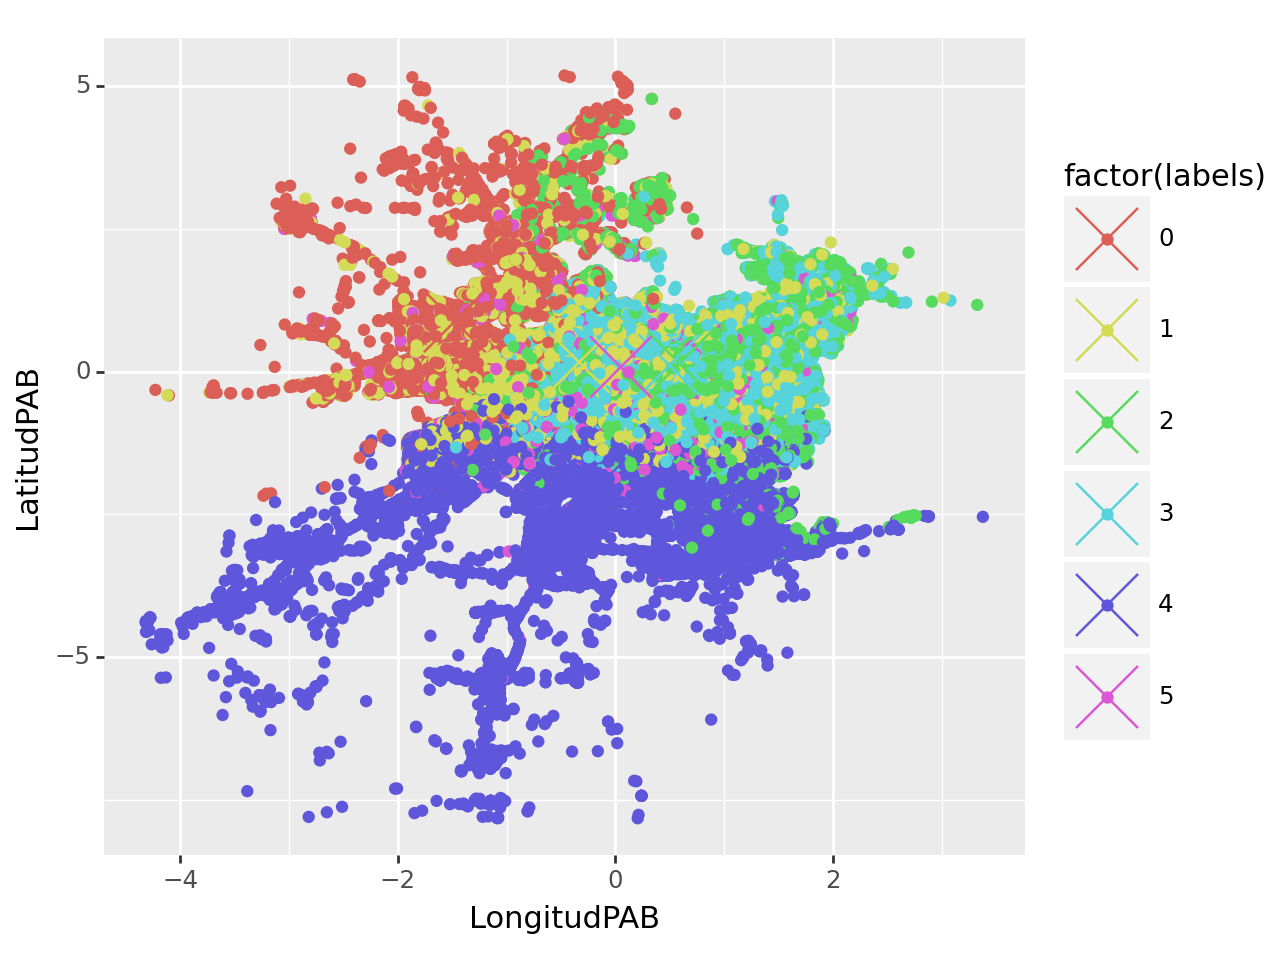

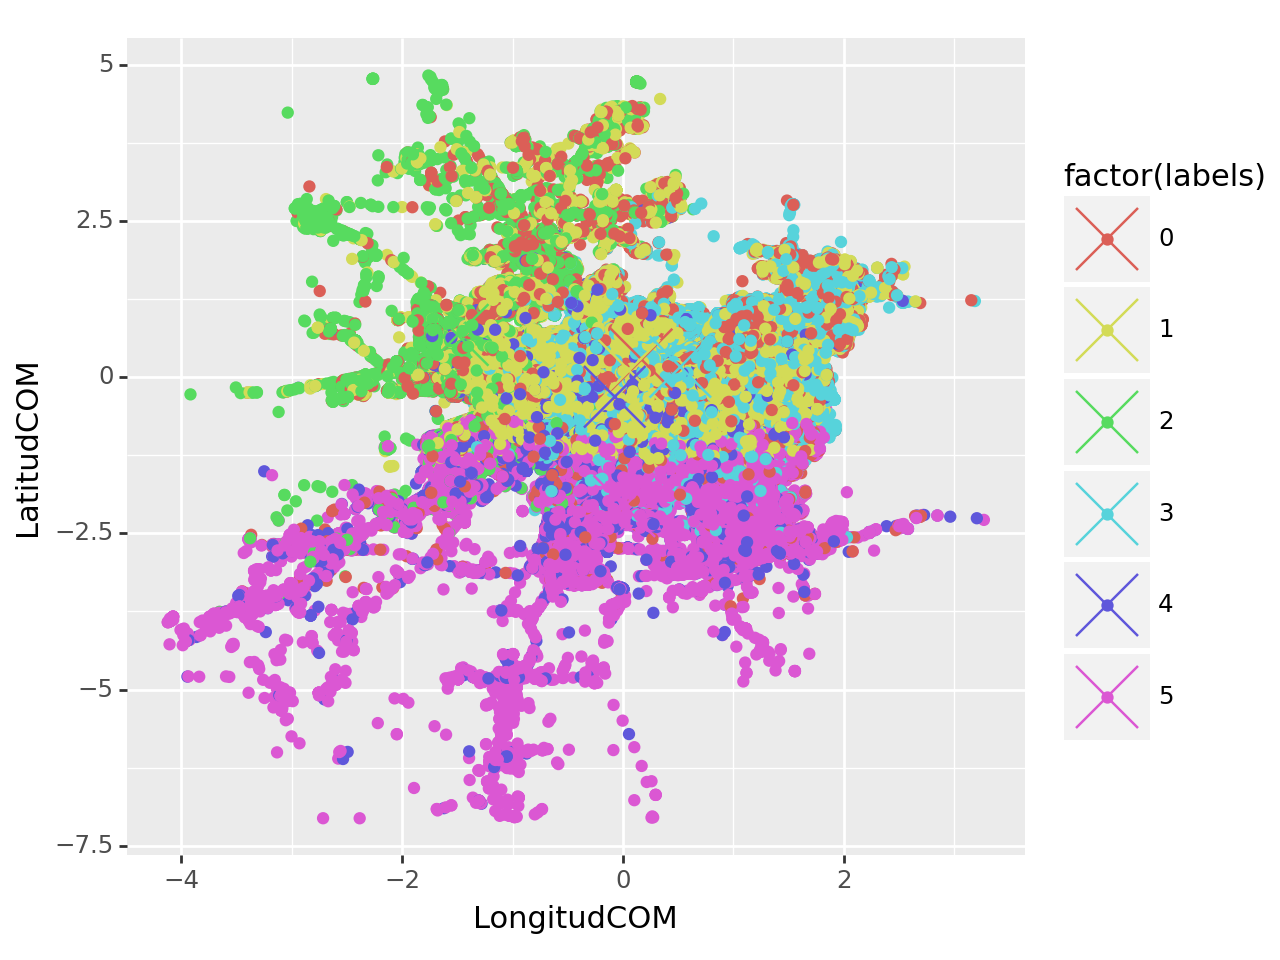

In [22]:
#Creando data frame con los datos y etiquetas

tempDF=pd.DataFrame(data_encoded,columns=data_encoded.columns)

tempDF['labels']=km.labels_
print('DATOS ORIGINALES:')

#Creando data frame con los centros y etiquetas
tempDF2=pd.DataFrame(km.cluster_centers_,columns=data_encoded.columns[0:14])
tempDF2['labels']=range(km.n_clusters)


print("\n\nCENTROIDES\n")
from sympy import Matrix
print('Centroides por variable:')
display(Matrix(km.cluster_centers_)) #Mostrando los centros de los clusters

#creando el gráfico
#(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="factor(labels)")+geom_point()
print(ggplot(tempDF)+aes(x="LongitudPAB", y="LatitudPAB",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12))
print(ggplot(tempDF)+aes(x="LongitudCOM", y="LatitudCOM",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12))

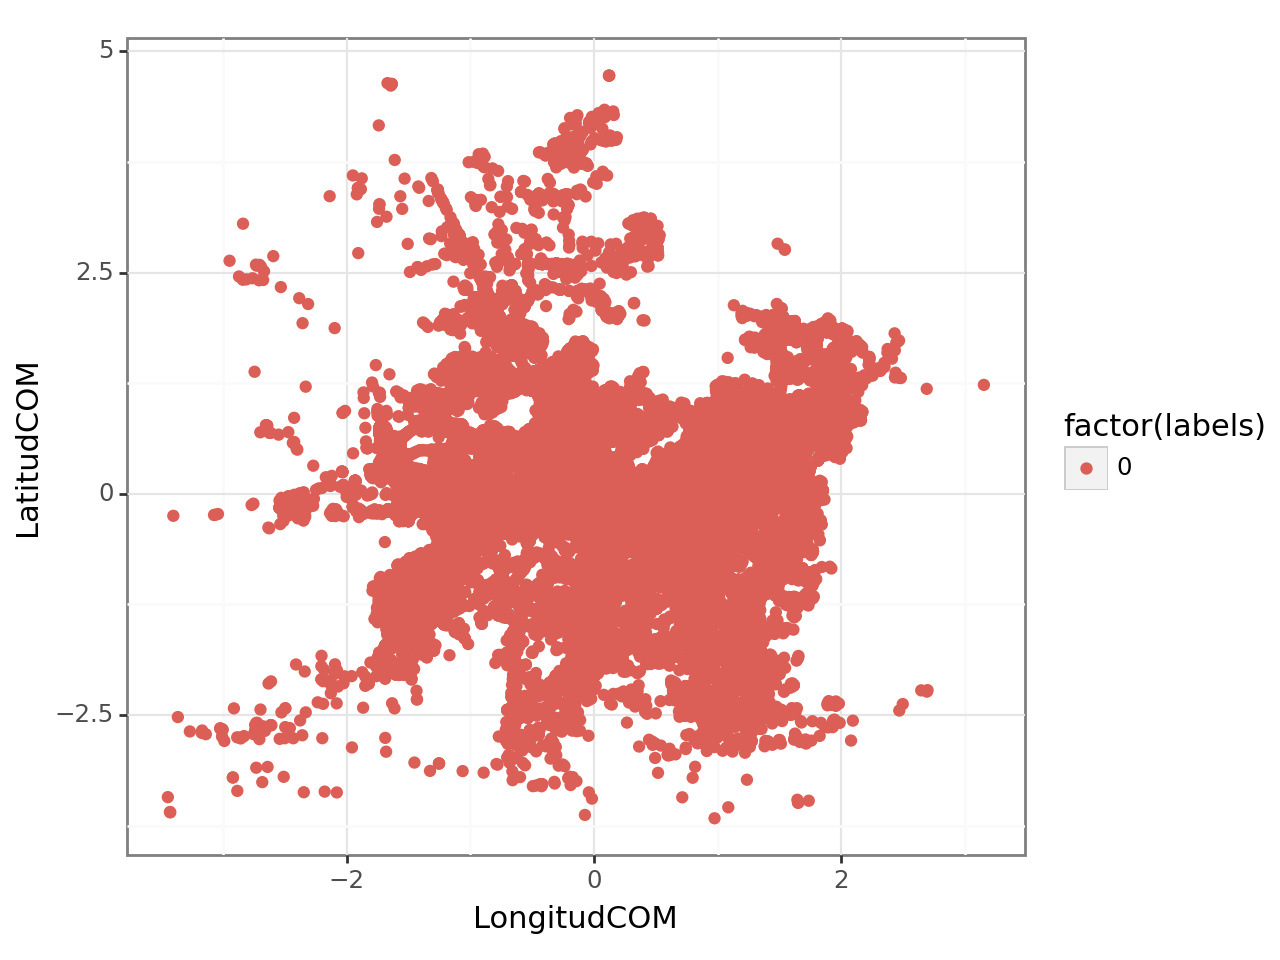

<Figure Size: (640 x 480)>

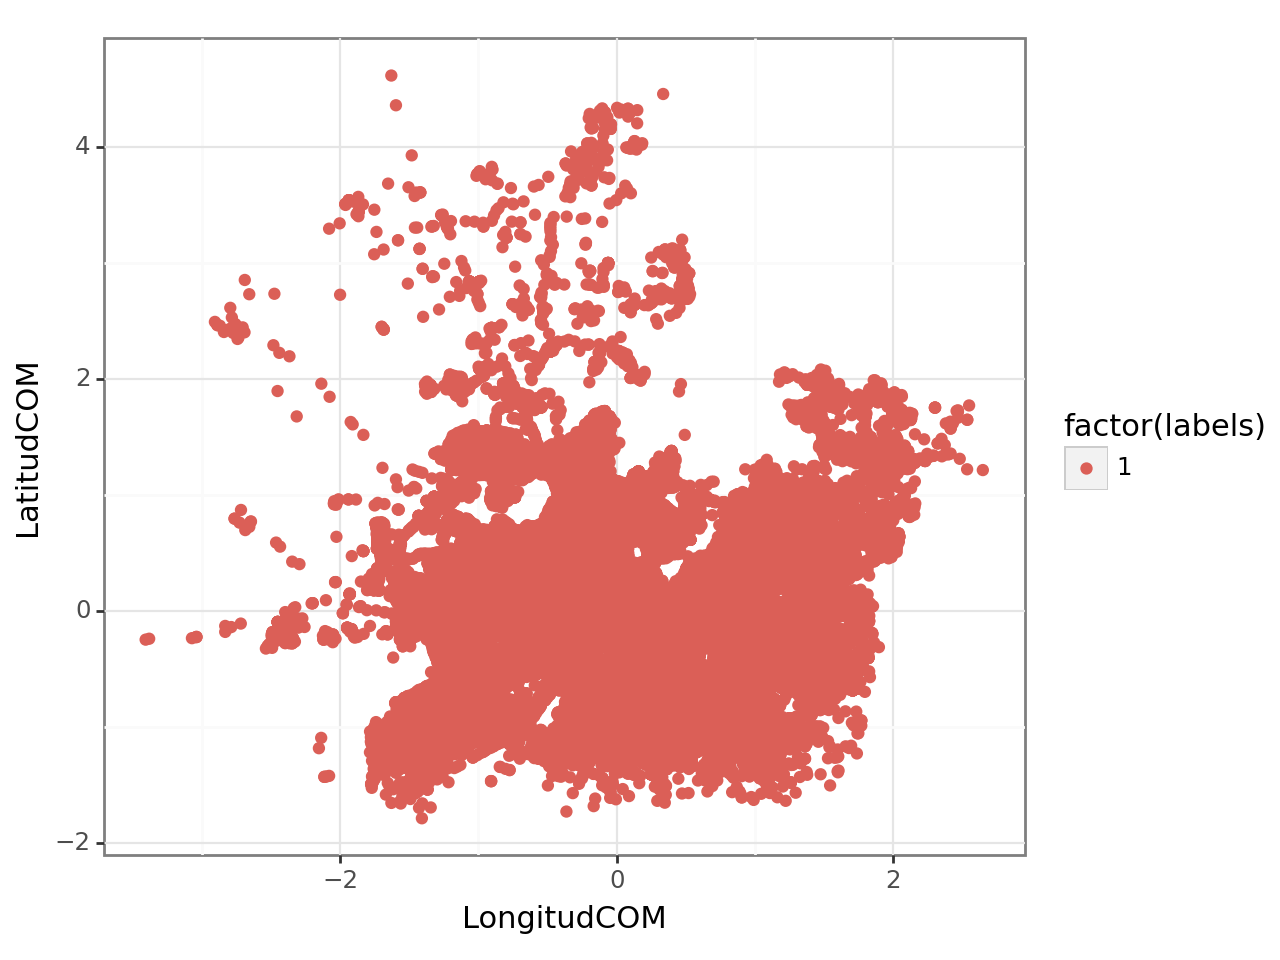

<Figure Size: (640 x 480)>

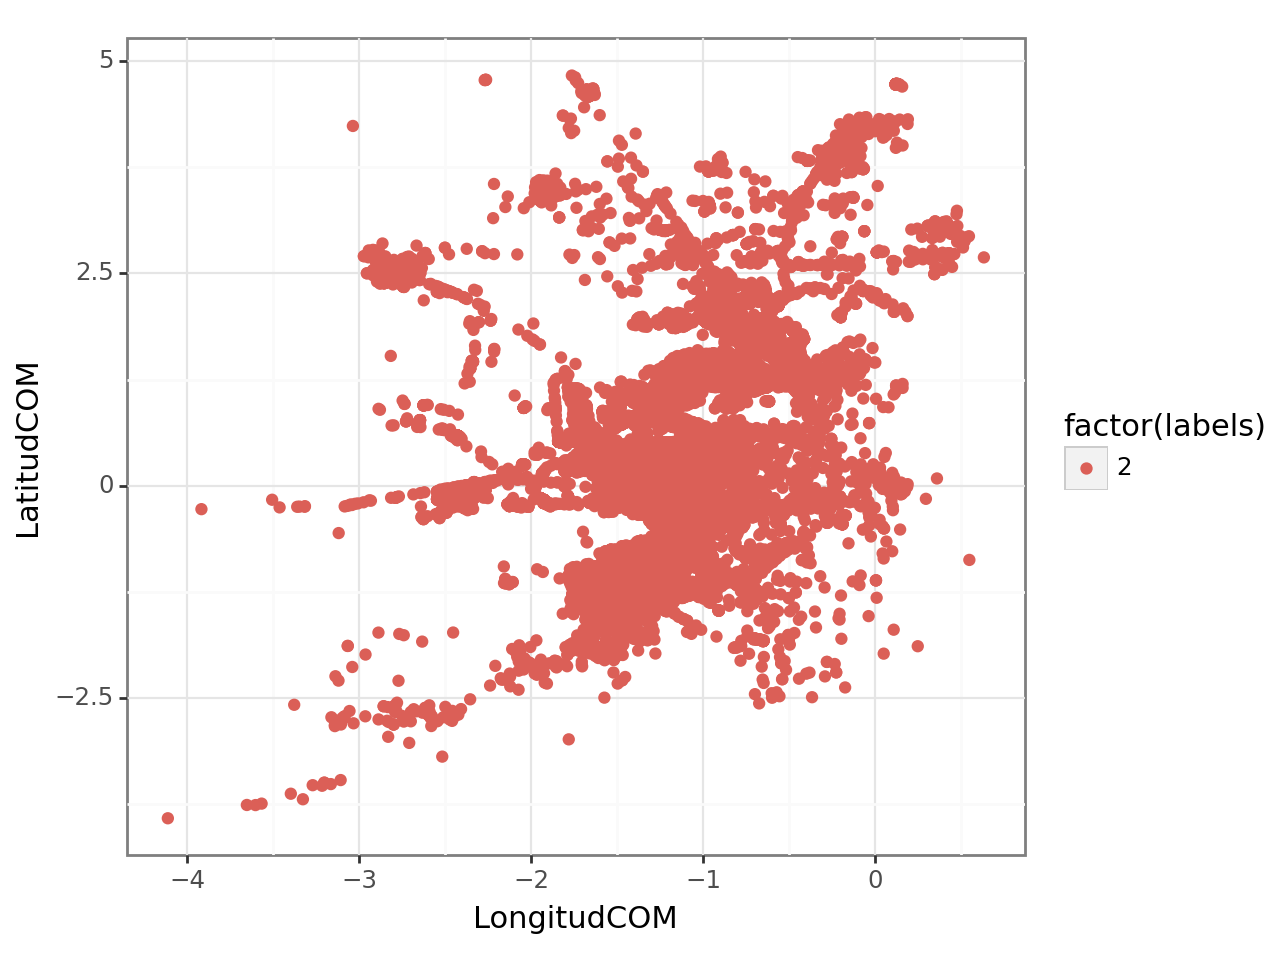

<Figure Size: (640 x 480)>

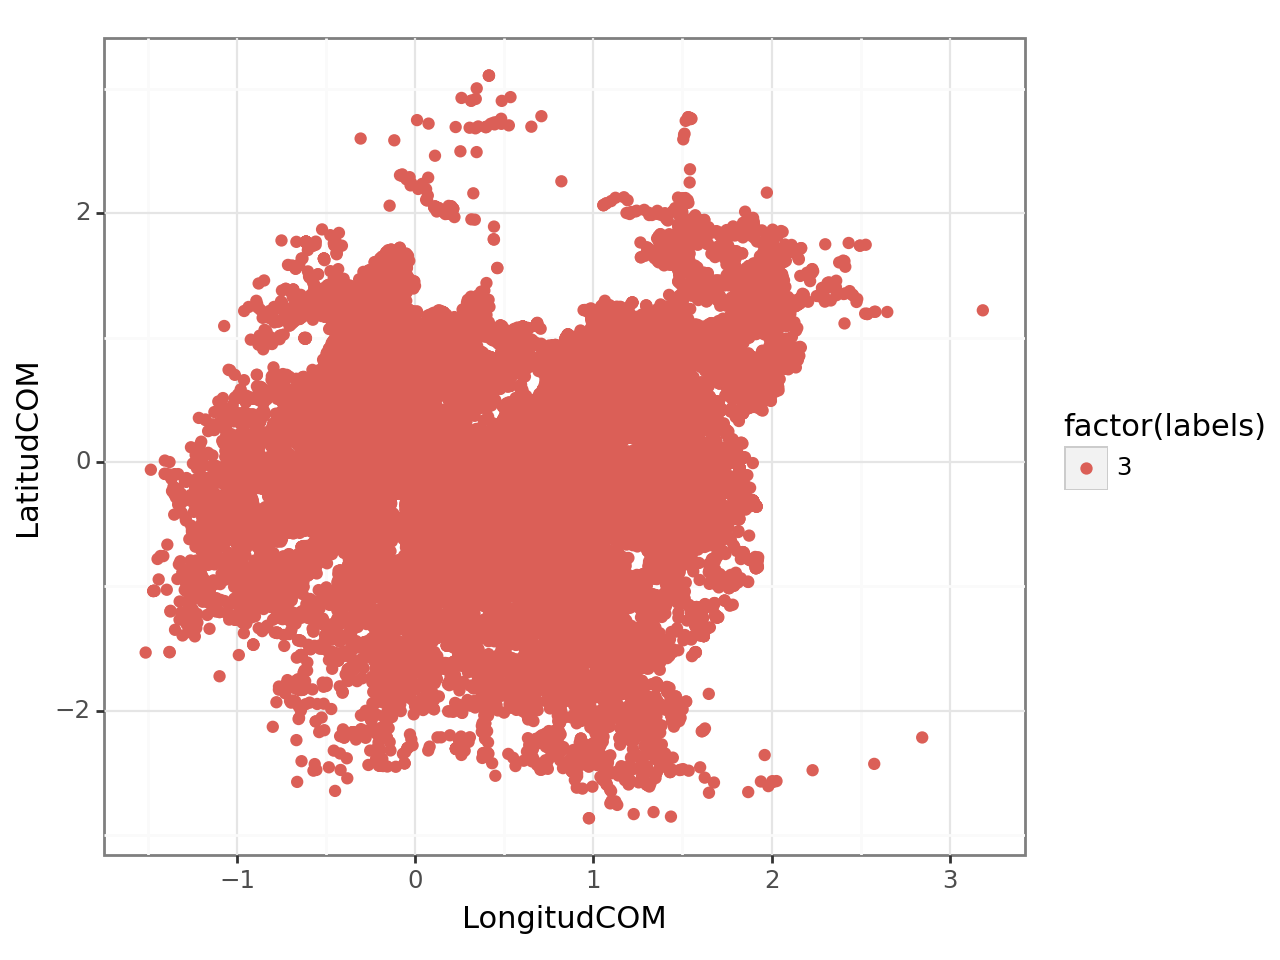

<Figure Size: (640 x 480)>

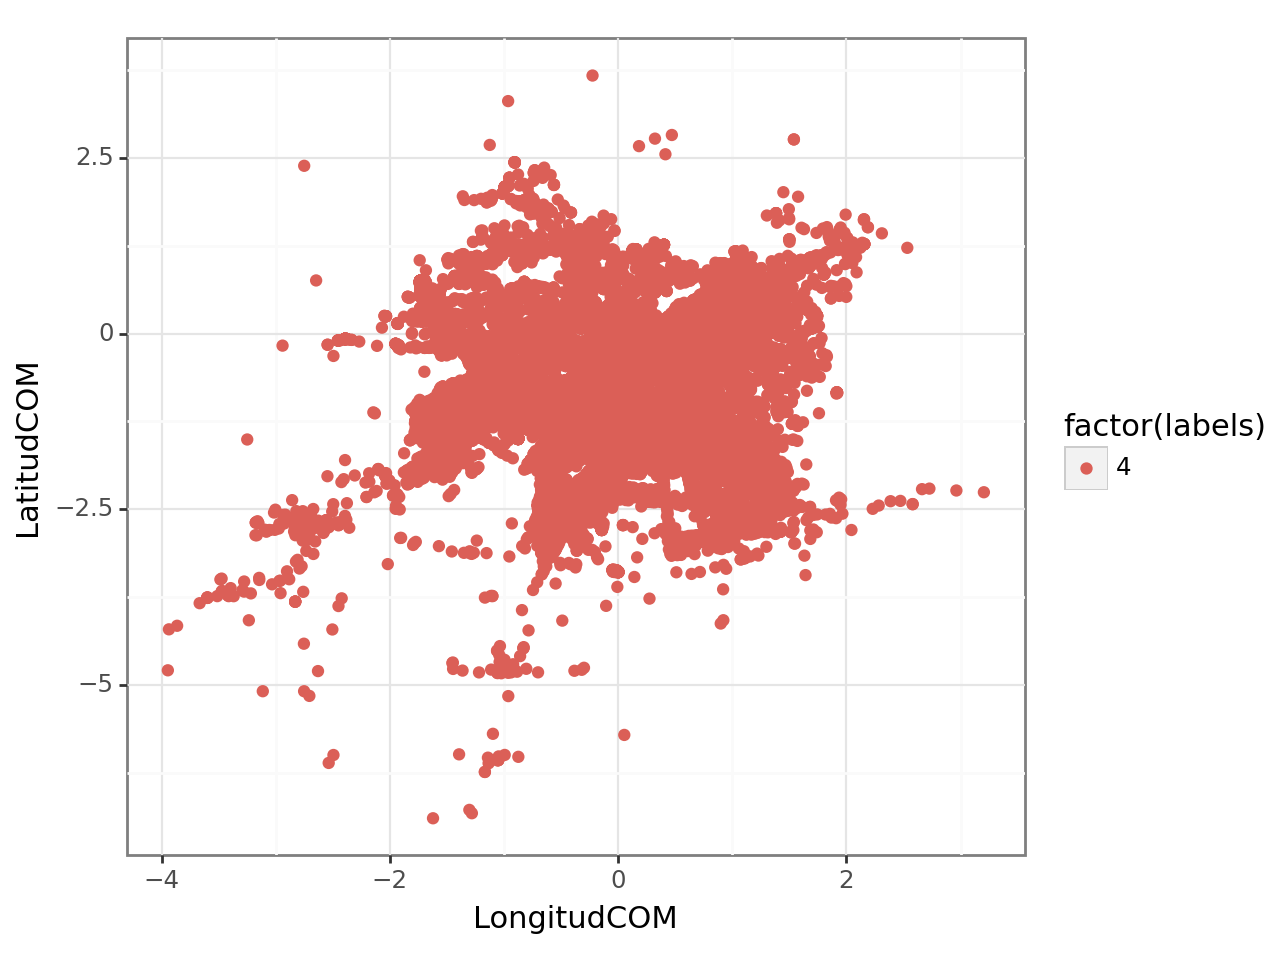

<Figure Size: (640 x 480)>

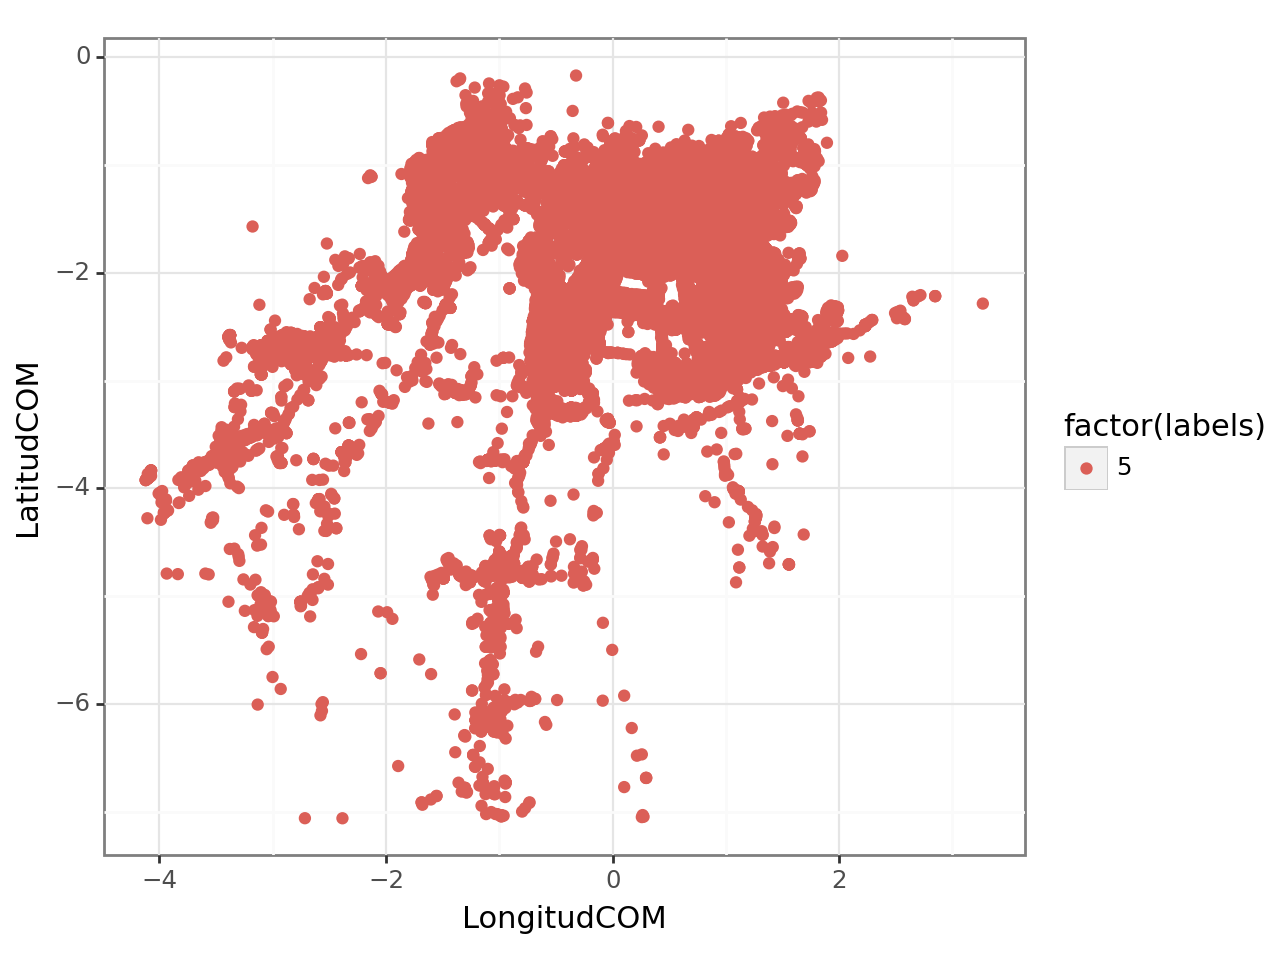

<Figure Size: (640 x 480)>

In [23]:
for i in range(0,6):
    cluster = data_encoded[data_encoded['labels'] == i]
    display(ggplot(cluster)+aes(x="LongitudCOM",y="LatitudCOM",color="factor(labels)")+geom_point(show_legend=True)+theme_bw())

In [24]:
cluster = data_encoded[data_encoded['labels'] == i]
len(cluster)

38912

In [25]:
data_usar = data_encoded
data_usar.drop(columns=['labels'], inplace=True)
data_usar

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Inicio,Fin,distKilometros,DoW_domingo,DoW_jueves,DoW_lunes,DoW_martes,DoW_miercoles,DoW_sabado,DoW_viernes
0,-0.863928,-1.054064,0.080578,0.173438,-1.565291,-1.551831,-0.129543,0,0,0,0,0,1,0
1,-1.563796,-1.694225,0.090296,0.176944,-1.710319,-1.694343,0.705729,0,0,0,0,0,1,0
2,-0.343831,0.331501,0.088519,0.177128,-1.710319,-1.694343,-1.091470,0,0,0,0,0,1,0
3,2.579938,-3.037538,0.082890,0.176426,-1.710319,-1.694343,2.240354,0,0,0,0,0,1,0
4,-0.015977,0.117358,2.450896,-2.871585,-0.260042,-0.269221,2.234340,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452161,0.468436,0.911923,0.653799,-1.730698,1.625317,1.583438,1.173645,1,0,0,0,0,0,0
452162,1.062036,-0.053113,0.530506,-1.729400,1.480290,1.583438,0.330768,1,0,0,0,0,0,0
452163,-2.591700,-0.656191,0.658238,-1.728029,1.625317,1.583438,1.458678,1,0,0,0,0,0,0
452164,0.720342,-1.820019,0.157853,0.474442,1.480290,1.583438,0.749361,1,0,0,0,0,0,0


In [26]:
WCD = []
for i in range(0,6):
    cluster = data_encoded[data_encoded['labels'] == i]
    cluster.drop(columns=['labels'], inplace=True)
    centroide = km.cluster_centers_[i]

    distancia_al_centroide = np.linalg.norm(cluster - centroide, axis=1)
    distancia_intra_cluster = np.sum(distancia_al_centroide)
    WCD.append(distancia_intra_cluster)
    


display(Matrix([round(numero) for numero in WCD]))

print("El promedio es:", round(sum(WCD) / len(WCD)))


KeyError: 'labels'

In [149]:
kmeans.labels_

array([14, 14,  2, ..., 11,  3, 11], dtype=int32)

In [150]:
from sklearn.metrics import silhouette_score

print(silhouette_score(data_encoded, kmeans.labels_))

KeyboardInterrupt: 

## Problema 3) Explique los clusters encontrados en el problema 2) para una persona que no entiende lo que es un proceso de clusterización.

## Problema 4) Modifique k-means para que una vez que sea aplicado con un valor dado de k, analice cada cluster y, según alguna regla definida por usted, determine que clusters están mal definidos/incorrectos. Posteriormente, cada cluster incorrecto sepárelo en dos clusters y vuelva a correr k-means con el nuevo número de clusters y centroides. Repita este proceso hasta que todos los clusters encontrados sean considerados correctos.
